In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
path = r'Datasets/cardekho.csv'
data = pd.read_csv(path)

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


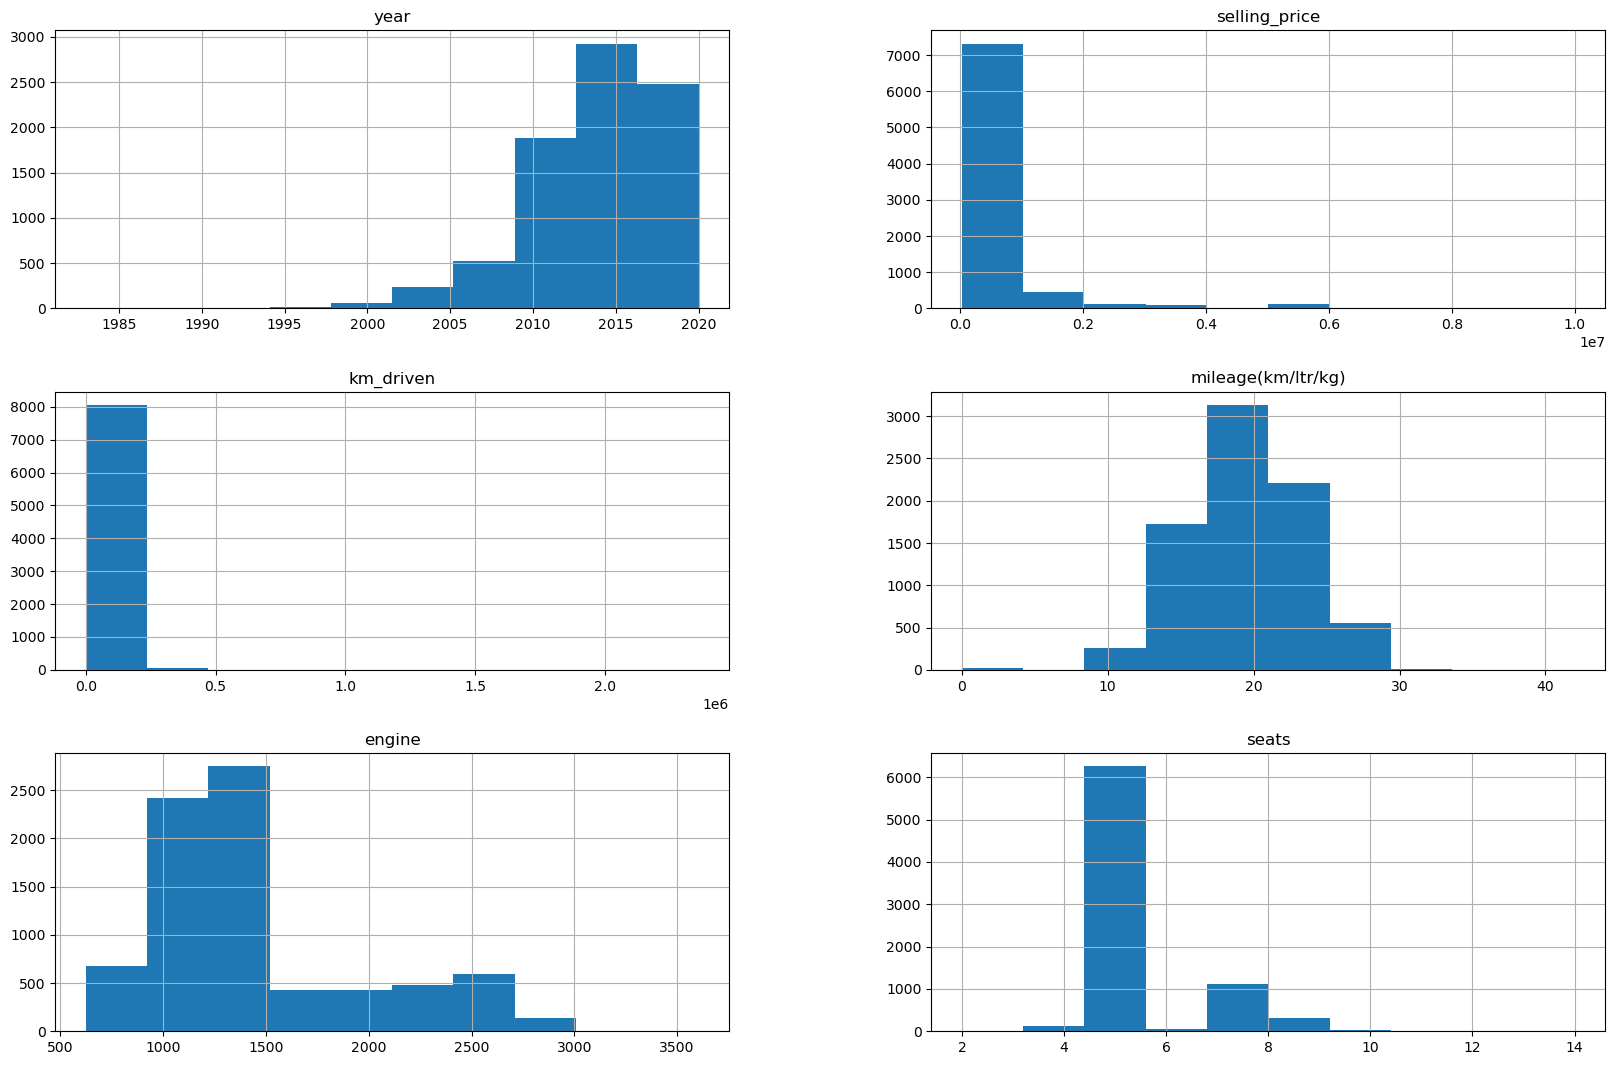

In [4]:
data.hist(figsize=(20, 13));

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [6]:
(data == 0).sum()

name                   0
year                   0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage(km/ltr/kg)    17
engine                 0
max_power              0
seats                  0
dtype: int64

In [7]:
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
columns_to_impute = ['mileage(km/ltr/kg)', 'engine']
to_imputer = KNNImputer(n_neighbors=10)

data[columns_to_impute] = to_imputer.fit_transform(data[columns_to_impute])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [10]:
to_OHE = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']
data_encoded = pd.concat([data.drop(columns=to_OHE), pd.get_dummies(data[to_OHE])], axis=1)

In [11]:
data_encoded

,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,year,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,max_power_98.59,max_power_98.6,max_power_98.63,max_power_98.79,max_power_98.82,max_power_98.96,max_power_98.97,max_power_99,max_power_99.23,max_power_99.6
0,450000,145500,23.40,1248.0,5.0,2014,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,370000,120000,21.14,1498.0,5.0,2014,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,158000,140000,17.70,1497.0,5.0,2006,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,225000,127000,23.00,1396.0,5.0,2010,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,130000,120000,16.10,1298.0,5.0,2007,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,18.50,1197.0,5.0,2013,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8124,135000,119000,16.80,1493.0,5.0,2007,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8125,382000,120000,19.30,1248.0,5.0,2009,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8126,290000,25000,23.57,1396.0,5.0,2013,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
columns_of_interest = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']

# بررسی تعداد مقادیر یکتا در ستون‌های انتخاب شده
for column in columns_of_interest:
    unique_count = data[column].nunique()  # تعداد مقادیر یکتا (منحصر به فرد)
    print(f"ستون {column} شامل {unique_count} مقدار منحصر به فرد است.")

ستون name شامل 2058 مقدار منحصر به فرد است.
ستون year شامل 29 مقدار منحصر به فرد است.
ستون fuel شامل 4 مقدار منحصر به فرد است.
ستون seller_type شامل 3 مقدار منحصر به فرد است.
ستون transmission شامل 2 مقدار منحصر به فرد است.
ستون owner شامل 5 مقدار منحصر به فرد است.
ستون max_power شامل 320 مقدار منحصر به فرد است.


In [13]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Columns: 2398 entries, selling_price to max_power_99.6
dtypes: bool(2392), float64(3), int64(3)
memory usage: 18.9 MB


In [14]:
columns_name = data_encoded.columns.to_list()
to_MMS = MinMaxScaler()
data_encoded[columns_name] = to_MMS.fit_transform(data_encoded[columns_name])

In [15]:
data_encoded

,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,year,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,max_power_98.59,max_power_98.6,max_power_98.63,max_power_98.79,max_power_98.82,max_power_98.96,max_power_98.97,max_power_99,max_power_99.23,max_power_99.6
0,0.042126,0.061640,0.557143,0.209396,0.25,0.837838,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.034102,0.050837,0.503333,0.293289,0.25,0.837838,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012839,0.059310,0.421429,0.292953,0.25,0.621622,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.019559,0.053803,0.547619,0.259060,0.25,0.729730,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010030,0.050837,0.383333,0.226174,0.25,0.648649,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.029087,0.046601,0.440476,0.192282,0.25,0.810811,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8124,0.010532,0.050414,0.400000,0.291611,0.25,0.648649,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8125,0.035306,0.050837,0.459524,0.209396,0.25,0.702703,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8126,0.026078,0.010591,0.561190,0.259060,0.25,0.810811,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Columns: 2398 entries, selling_price to max_power_99.6
dtypes: float64(2398)
memory usage: 148.7 MB


In [17]:
file_path = r'Datasets/processed_data.csv'
data_encoded.to_csv(file_path, index=False)
print(f"داده‌های پردازش شده با موفقیت ذخیره شدند در: {file_path}")

داده‌های پردازش شده با موفقیت ذخیره شدند در: Datasets/processed_data.csv


In [18]:
X = data_encoded.drop('selling_price', axis=1).values
y = data_encoded['selling_price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
y

array([0.04212648, 0.0341024 , 0.01283861, ..., 0.03530601, 0.02607833,
       0.02607833])

In [42]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.4, learning_rate=0.1, max_depth=7, n_estimators=5500, verbosity=3,
                          n_jobs=-1)
xg_reg.fit(X_train, y_train)

[19:28:01] DEBUG: /croot/xgboost-split_1675457761144/work/src/gbm/gbtree.cc:157: Using tree method: 2
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=7
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=7
[19:28:01] INFO: /croot/xgboost-split_1675457761144/work/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=7
[19:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
y_pred = xg_reg.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

0.006559215477517571

In [44]:
metrics.r2_score(y_test, y_pred)

0.9669233278999828

<Figure size 1500x1000 with 0 Axes>

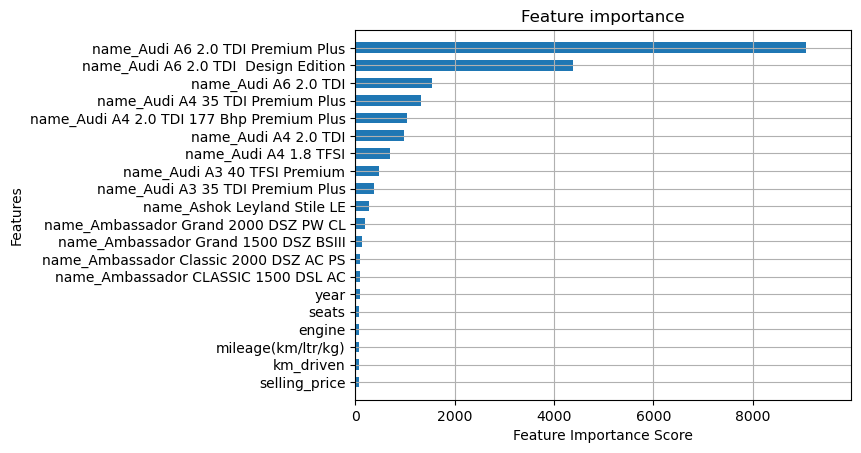

In [45]:

# در اینجا فرض می‌کنیم xg_reg یک مدل XGBoost با استفاده از داده‌های df باشد
# df.columns: لیست نام ستون‌های داده‌ی شما

plt.figure(figsize=(15, 10))  # تنظیم اندازه نمودار

# نمایش اهمیت ویژگی‌ها با نام ستون‌ها و محدود کردن تعداد به ۲۰ ستون اول
xgb.plot_importance(xg_reg, max_num_features=20, height=0.6, show_values=False, importance_type='weight')

# به دست آوردن نام ستون‌ها
feature_names = data_encoded.columns

# تنظیم محور x بر اساس نام ستون‌ها
plt.yticks(ticks=list(range(20)), labels=feature_names[:20])  # فقط ۲۰ ستون اول را نمایش می‌دهیم
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.savefig('Datasets/feature_importance_plot.png')
plt.show()